In [1]:
import sys
sys.path.append("/Users/thevault/.virtualenvs/generalTools/lib/python2.7/site-packages") # go to parent dir


In [2]:
from bs4 import BeautifulSoup

import urllib
import requests

try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import os
import sys
import subprocess

In [3]:
def linkExtract(soup):
	try:
		for link in soup.find_all('a'):
			if key in link.get('href'):
				new_link=link.get('href')
				
				if new_link not in linkPool:
					linkPool.append(new_link)
	except:
		pass

def imageExtract(url,soup):

	for link in soup.find_all('img'):
		
		if link.get('src') and key in link.get('src') and ("square" in link.get('src')):

			urlBig=link.get('src').replace("square","big")
			print url,",",urlBig,",",image2String(urlBig),",",qrCode2string(urlBig)

		if link.get('src_data')  and key in link.get('src_data') and ("square" in link.get('src_data')):

			urlBig=link.get('src_data').replace("square","big")
			print url,",",urlBig,",",image2String(urlBig),",",qrCode2string(urlBig)

		if link.get('data-src')  and key in link.get('data-src') and ("square" in link.get('data-src')):

			urlBig=link.get('data-src').replace("square","big")
			print url,",",urlBig,",",image2String(urlBig),",",qrCode2string(urlBig)


def imageSave(url,soup):

    for link in soup.find_all('img'):

        try:
                if link.get('src') and key in link.get('src') and ("square" in link.get('src')):
                    print(link.get('src').split("/")[4])
                    urlBig=link.get('src').replace("square","big")


                    urllib.urlretrieve(urlBig, link.get('src').split("/")[4]+".jpg")

                if link.get('src_data')  and key in link.get('src_data') and ("square" in link.get('src_data')):
                    print(link.get('src').split("/")[4])
                    urlBig=link.get('src_data').replace("square","big")
                    print urlBig
                    urllib.urlretrieve(urlBig,link.get('src').split("/")[4]+".jpg")

                if link.get('data-src')  and key in link.get('data-src') and ("square" in link.get('data-src')):
                    print(link.get('src').split("/")[4])
                    urlBig=link.get('data-src').replace("square","big")
                    print urlBig
                    urllib.urlretrieve(urlBig, link.get('src').split("/")[4]+".jpg")

                if link.get('data-src')  and key in link.get('data-src')and ("big" in link.get('data-src')) :
                    print "http://"+link.get('data-src').replace("//", "")
                    print link.get('src').split("/")[4]+".jpg"             
                    urllib.urlretrieve("http://"+link.get('data-src').replace("//", ""),link.get('src').split("/")[4]+".jpg")
        except:
            pass
		

		
def image2String(url):
    
    urllib.urlretrieve(url, "inputIMG"+key+".jpg")
    grayImage = []
    grayImage += ('convert', "inputIMG"+key+".jpg")
    grayImage += ('-resize', '400%')
    grayImage+=('-sigmoidal-contrast','20')
    grayImage += ('-type', 'Grayscale','input'+key+'.tif')
    proc = subprocess.Popen(grayImage, stderr=subprocess.PIPE)
    status = proc.wait()
    error_string = proc.stderr.read()
    proc.stderr.close()
    	
    return pytesseract.image_to_string(Image.open('input'+key+'.tif'))		


def qrCode2string(url):
	#Estrazione QRCode
	urllib.urlretrieve(url, "inputCode"+key+".jpg")
	QRImage = []
	QRImage += ('zxing','--try-harder', "inputCode"+key+".jpg")
	proc = subprocess.Popen(QRImage, stdout=subprocess.PIPE)
	status = proc.wait()
	error_string2 = proc.stdout.read()
	proc.stdout.close()
	return(error_string2)
	#Fine Estrazione QRCode

In [ ]:
url="http://topratedfashion.x.yupoo.com/albums?tab=gallery"
key="topratedfashion"
linkPool=[]
linkPool.append(url)
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "html.parser")

In [ ]:
linkExtract(soup)

In [ ]:
for url in linkPool:
    try:
        url=url.split("//")[1]
        if "http://" not in url:
            url="http://"+url
            print url
            r  = requests.get(url)
            data = r.text
            soup = BeautifulSoup(data, "html.parser")
            linkExtract(soup)
            imageExtract(url,soup)
            imageSave(url,soup)
    except:
        pass

In [9]:
url="http://topratedfashion.x.yupoo.com/albums/4470330?uid=1"
key="topratedfashion"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "html.parser")

<img alt="Yupoo" src="https://upzip.b0.upaiyun.com/website/3.5.3/imgs/logo_3.png"/>

<img alt="" class="autocover" data-type="photo" src="//photo.yupoo.com/topratedfashion/G11mCDAU/medium.jpg"/>
<img alt="" class="autocover image__img image__portrait" data-album-id="4470330" data-frame="" data-height="600" data-origin-src="//photo.yupoo.com/topratedfashion/G11qzZUK/Bmzz7.jpg" data-path="/topratedfashion/G11qzZUK/Bmzz7.jpg" data-src="//photo.yupoo.com/topratedfashion/G11qzZUK/big.jpg" data-type="photo" data-videoformats="false" data-width="600" src="//photo.yupoo.com/topratedfashion/G11qzZUK/small.jpg"/>
http://photo.yupoo.com/topratedfashion/G11qzZUK/big.jpg
G11qzZUK.jpg
<img alt="" class="autocover image__img image__portrait" data-album-id="4470330" data-frame="" data-height="600" data-origin-src="//photo.yupoo.com/topratedfashion/G11qzUur/10yN9Y.jpg" data-path="/topratedfashion/G11qzUur/10yN9Y.jpg" data-src="//photo.yupoo.com/topratedfashion/G11qzUur/big.jpg" data-type="photo" data-v
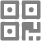

In [10]:
for link in soup.find_all('img'):
    print link
    try:
            if link.get('src') and key in link.get('src') and ("square" in link.get('src')):
                print(link.get('src').split("/")[4])
                urlBig=link.get('src').replace("square","big")
                urllib.urlretrieve(urlBig, link.get('src').split("/")[4]+".jpg")

            if link.get('src_data')  and key in link.get('src_data') and ("square" in link.get('src_data')):
                print(link.get('src').split("/")[4])
                urlBig=link.get('src_data').replace("square","big")
                print urlBig
                urllib.urlretrieve(urlBig,link.get('src').split("/")[4]+".jpg")

            if link.get('data-src')  and key in link.get('data-src') and ("square" in link.get('data-src')):
                print(link.get('src').split("/")[4])
                urlBig=link.get('data-src').replace("square","big")
                print urlBig
                urllib.urlretrieve(urlBig, link.get('src').split("/")[4]+".jpg")
                
            if link.get('data-src')  and key in link.get('data-src')and ("big" in link.get('data-src')) :
                print "http://"+link.get('data-src').replace("//", "")
                print link.get('src').split("/")[4]+".jpg"             
                urllib.urlretrieve("http://"+link.get('data-src').replace("//", ""),link.get('src').split("/")[4]+".jpg")
    except:
        pass

In [6]:
urllib.urlretrieve("http://photo.yupoo.com/topratedfashion/F6BqfGLB/big.jpg", "F6BqfGLB.jpg")

('F6BqfGLB.jpg', <httplib.HTTPMessage instance at 0x1146e5710>)